# Energy Consumption Level Prediction
![Energy Consumption Level Prediction](Images/Energy.jpg)
## Objective:
<p align="justify">
Predict energy consumption levels combining IoT sensor measurements to weather data. KNN and Random Forest are compared and evaluated considering a wide range of metrics such as R.M.S.E., M.A.E., R squared and M.S.E. A principal componenet analysis (PCA) is carried out to reduce dimensionality and algorithms' learning curves are evaluated too. The research presents KNN as a valuable model for effective energy management and planning.
</p>

[Energy.csv](https://github.com/justgrossi/Portfolio/blob/main/3.Energy_Consumption_Prediction/energy.csv)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# Data exploration
def load_and_inspect_data(file_path):
    """Load the dataset and perform initial inspection"""
    print("=" * 60)
    print("LOADING AND INSPECTING DATA")
    print("=" * 60)
    
    # Load the data
    df = pd.read_csv(file_path)
    
    print(f"Dataset shape: {df.shape}")
    print(f"\nColumn names and types:")
    print(df.dtypes)
    
    print(f"\nMissing values per column:")
    missing_values = df.isnull().sum()
    print(missing_values[missing_values > 0])

    print(f"\nDuplicated values:")
    print(df.duplicated().sum())
    display(df.head())
    return df

In [3]:
file_path='energy.csv'
df=load_and_inspect_data(file_path)

LOADING AND INSPECTING DATA
Dataset shape: (19735, 32)

Column names and types:
day              int64
month            int64
year             int64
hour             int64
minute           int64
sec              int64
consumption      int64
lights           int64
Tkitch         float64
Hkitch         float64
Tliving        float64
Hliving        float64
Tlaun          float64
Hlaun          float64
Toffice        float64
Hoffice        float64
Tbath          float64
Hbath          float64
Tout           float64
Hout           float64
Tiron          float64
Hiron          float64
Tteen          float64
Hteen          float64
Tpar           float64
Hpar           float64
tempOut        float64
pressOut       float64
hOut           float64
wind           float64
vis            float64
dew            float64
dtype: object

Missing values per column:
Series([], dtype: int64)

Duplicated values:
0


,day,month,year,hour,minute,sec,consumption,lights,Tkitch,Hkitch,...,Tteen,Hteen,Tpar,Hpar,tempOut,pressOut,hOut,wind,vis,dew
0,11,1,2016,17,0,0,60,30,19.89,47.596667,...,18.2,48.900000,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3
1,11,1,2016,17,10,0,60,30,19.89,46.693333,...,18.2,48.863333,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2
2,11,1,2016,17,20,0,50,30,19.89,46.300000,...,18.2,48.730000,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1
3,11,1,2016,17,30,0,50,40,19.89,46.066667,...,18.1,48.590000,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0
4,11,1,2016,17,40,0,60,40,19.89,46.333333,...,18.1,48.590000,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9



🔎 XGBoost
Best Params: {'model__colsample_bytree': 1.0, 'model__learning_rate': 0.05, 'model__max_depth': 10, 'model__n_estimators': 800, 'model__subsample': 0.8, 'pca__n_components': 15}
CV RMSE: 78.0401
Test RMSE: 75.0782
Test MAE: 36.8328
Test R²: 0.4529
Features after preprocessing: 29 (from 31)


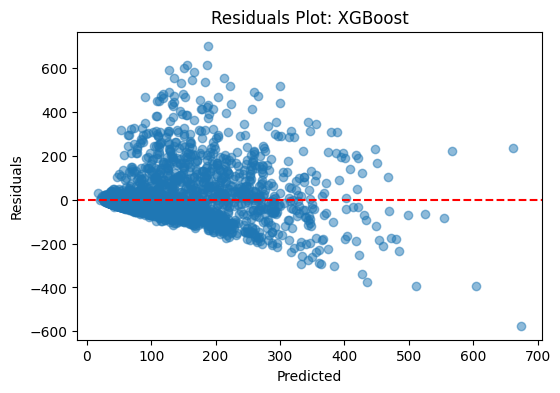

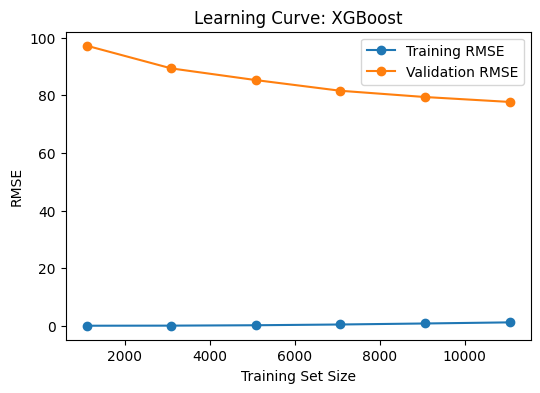


Feature Importances (mapped back from PCA):
     feature  importance
26      wind    0.223110
2       hour    0.219723
4     lights    0.189324
24  pressOut    0.170495
0        day    0.163307
14     Hbath    0.162699
7    Tliving    0.154965
8    Hliving    0.154406
25      hOut    0.154269
19     Tteen    0.145424
28       dew    0.142473
6     Hkitch    0.135185
18     Hiron    0.118875
15      Tout    0.118276
23   tempOut    0.115592
11   Toffice    0.114871
1      month    0.114008
5     Tkitch    0.112029
22      Hpar    0.110174
20     Hteen    0.109048
27       vis    0.106412
10     Hlaun    0.105066
17     Tiron    0.103751
16      Hout    0.100495
13     Tbath    0.087510
9      Tlaun    0.079670
12   Hoffice    0.065415
3     minute    0.061150
21      Tpar    0.059533


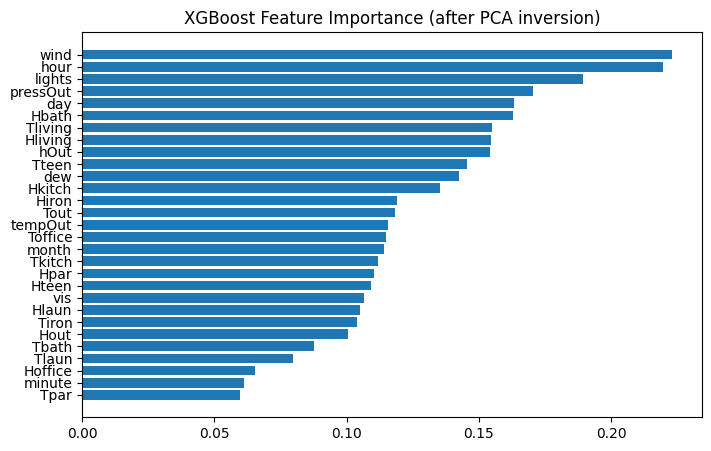


PCA Loadings:
          day     month      hour    minute    lights    Tkitch    Hkitch  \
PC1 -0.045090  0.271273  0.049230 -0.001987 -0.035401  0.287392  0.050003   
PC2 -0.011098 -0.090966 -0.054309 -0.000834  0.031500  0.025645  0.336257   
PC3 -0.003797  0.183521 -0.415732 -0.003586 -0.170100  0.033211 -0.039560   
PC4 -0.202212 -0.046937  0.416460  0.018617  0.577396  0.145948  0.053649   
PC5  0.618391 -0.074381  0.156870  0.001797  0.155018  0.045116  0.044549   

      Tliving   Hliving     Tlaun  ...     Tteen     Hteen      Tpar  \
PC1  0.261608 -0.009910  0.290574  ...  0.266449 -0.029843  0.297380   
PC2  0.057459  0.299140  0.047578  ... -0.061167  0.342742 -0.013075   
PC3 -0.214245  0.240919  0.116969  ...  0.180929  0.071368  0.174472   
PC4  0.044409  0.052149  0.023584  ...  0.170662 -0.077857 -0.008390   
PC5  0.048074  0.028669  0.022054  ... -0.038570  0.018248 -0.017795   

         Hpar   tempOut  pressOut      hOut      wind       vis       dew  
PC1  0.002133

In [6]:
# 1. Train/Test split
X = df.drop(columns=['consumption'])
y = df['consumption']

feature_names = X.columns

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


# 2. Define preprocessing + models
preprocessing = [
    ("zero_var", VarianceThreshold(threshold=0.0)),
    ("scaler", StandardScaler()),
    ("nzv", VarianceThreshold(threshold=0.01)),
    ("pca", PCA())
]

# pipeline_knn = Pipeline(preprocessing + [("model", KNeighborsRegressor())])
# pipeline_rf  = Pipeline(preprocessing + [("model", RandomForestRegressor(random_state=42))])
pipeline_xgb = Pipeline(preprocessing + [("model", XGBRegressor(random_state=42, n_jobs=-1))])


# 3. Define parameter grids
# param_grid_knn = {
#     "pca__n_components": [5, 10, 12],
#     "model__n_neighbors": [3, 5, 10],
#     "model__weights": ["uniform", "distance"],
#     "model__p": [1, 2]
# }

# param_grid_rf = {
#     "pca__n_components": [5, 10, 12],
#     "model__n_estimators": [200, 350, 400],
#     "model__max_depth": [15, 20],
#     "model__min_samples_split": [2, 3, 5]
# }

param_grid_xgb = {
    "pca__n_components": [12, 15],
    "model__n_estimators": [600, 800],
    "model__max_depth": [5, 7, 10],
    "model__learning_rate": [0.01, 0.05, 0.1],
    "model__subsample": [0.8, 1.0],
    "model__colsample_bytree": [1.0]
}


# 4. Cross-validation setup
cv = KFold(n_splits=5, shuffle=True, random_state=42)


# 5. Run GridSearchCV
# grid_knn = GridSearchCV(pipeline_knn, param_grid_knn, cv=cv,
#                         scoring="neg_mean_squared_error", n_jobs=-1)
# grid_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=cv,
#                        scoring="neg_mean_squared_error", n_jobs=-1)
grid_xgb = GridSearchCV(pipeline_xgb, param_grid_xgb, cv=cv,
                        scoring="neg_mean_squared_error", n_jobs=-1)

# grid_knn.fit(X_train, y_train)
# grid_rf.fit(X_train, y_train)
grid_xgb.fit(X_train, y_train)


# 6. Helper function: get remaining features after preprocessing
def get_remaining_features(pipeline, original_features):
    """Get feature names that remain after variance threshold filtering"""
    temp_pipeline = Pipeline([
        ("zero_var", pipeline["zero_var"]),
        ("scaler", pipeline["scaler"]),
        ("nzv", pipeline["nzv"])
    ])
    
    temp_pipeline.fit(X_train)
    
    zero_var_mask = temp_pipeline["zero_var"].get_support()
    remaining_features_after_zero_var = original_features[zero_var_mask]
    
    nzv_mask = temp_pipeline["nzv"].get_support()
    final_features = remaining_features_after_zero_var[nzv_mask]
    
    return final_features


# 7. Evaluation function
def evaluate_model(name, grid, X_train, y_train, X_test, y_test, original_feature_names):
    print(f"\n🔎 {name}")
    print("Best Params:", grid.best_params_)

    remaining_features = get_remaining_features(grid.best_estimator_, original_feature_names)
    y_pred = grid.predict(X_test)

    # Metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"CV RMSE: {np.sqrt(-grid.best_score_):.4f}")
    print(f"Test RMSE: {rmse:.4f}")
    print(f"Test MAE: {mae:.4f}")
    print(f"Test R²: {r2:.4f}")
    print(f"Features after preprocessing: {len(remaining_features)} (from {len(original_feature_names)})")

    # Residual plot
    residuals = y_test - y_pred
    plt.figure(figsize=(6, 4))
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.axhline(0, color="red", linestyle="--")
    plt.xlabel("Predicted")
    plt.ylabel("Residuals")
    plt.title(f"Residuals Plot: {name}")
    plt.show()

    # Learning curve
    train_sizes, train_scores, val_scores = learning_curve(
        grid.best_estimator_, X_train, y_train, cv=5,
        scoring="neg_mean_squared_error", train_sizes=np.linspace(0.1, 1.0, 6),
        n_jobs=-1
    )
    train_rmse = np.sqrt(-train_scores.mean(axis=1))
    val_rmse = np.sqrt(-val_scores.mean(axis=1))

    plt.figure(figsize=(6, 4))
    plt.plot(train_sizes, train_rmse, "o-", label="Training RMSE")
    plt.plot(train_sizes, val_rmse, "o-", label="Validation RMSE")
    plt.xlabel("Training Set Size")
    plt.ylabel("RMSE")
    plt.title(f"Learning Curve: {name}")
    plt.legend()
    plt.show()

    # Feature importance (RF & XGB)
    if "RandomForest" in str(type(grid.best_estimator_["model"])) or \
       "XGBRegressor" in str(type(grid.best_estimator_["model"])):
        
        model = grid.best_estimator_["model"]
        importances = model.feature_importances_
        pca = grid.best_estimator_["pca"]

        components = pd.DataFrame(pca.components_, columns=remaining_features)
        mapped_importance = np.dot(importances, np.abs(components))

        imp_df = pd.DataFrame({
            "feature": remaining_features,
            "importance": mapped_importance
        }).sort_values(by="importance", ascending=False)

        print("\nFeature Importances (mapped back from PCA):")
        print(imp_df)

        plt.figure(figsize=(8, 5))
        plt.barh(imp_df["feature"], imp_df["importance"])
        plt.title(f"{name} Feature Importance (after PCA inversion)")
        plt.gca().invert_yaxis()
        plt.show()

    # PCA Loadings
    pca = grid.best_estimator_["pca"]
    loadings = pd.DataFrame(
        pca.components_,
        columns=remaining_features,
        index=[f"PC{i+1}" for i in range(pca.n_components_)]
    )
    print("\nPCA Loadings:")
    print(loadings.head())


# 8. Evaluate Models
# evaluate_model("KNN", grid_knn, X_train, y_train, X_test, y_test, feature_names)
# evaluate_model("Random Forest", grid_rf, X_train, y_train, X_test, y_test, feature_names)
evaluate_model("XGBoost", grid_xgb, X_train, y_train, X_test, y_test, feature_names)
